In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from neural_network import mnist_loader
import neural_network.neural_network2 as nn

In [94]:
from neural_network import viz

#### Get Digits Data

In [2]:
training_data, test_data = mnist_loader.extract()

#### Visualize the Data

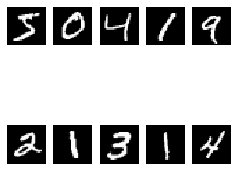

In [3]:
sample = training_data[0][:10]
sample = [x.reshape(28,28) for x in sample]
_, axarr = plt.subplots(2,5, figsize=(4,4))
for i in range(2):
    for j in range(5):
        k = i*5 + j
        axarr[i,j].imshow(sample[k], cmap='gray')
        axarr[i,j].axis('off')

### Train the Classifier

In [4]:
from importlib import reload

In [55]:
digits_nn = nn.NeuralNetwork([784, 30, 10], cost=quadraticcost)

In [56]:
performance_eval = digits_nn.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 3, regularization = 0, evaluation_data = test_data, epochs_per_print=2)

Epoch 2 complete
Loss on training data: 0.24
Accuracy on evaluation data: 7076/10000
--> 70.76%
Epoch 4 complete
Loss on training data: 0.12
Accuracy on evaluation data: 8820/10000
--> 88.20%
Epoch 6 complete
Loss on training data: 0.11
Accuracy on evaluation data: 9091/10000
--> 90.91%
Epoch 8 complete
Loss on training data: 0.09
Accuracy on evaluation data: 9180/10000
--> 91.80%
Epoch 10 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9232/10000
--> 92.32%
Epoch 12 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9261/10000
--> 92.61%
Epoch 14 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9226/10000
--> 92.26%
Epoch 16 complete
Loss on training data: 0.09
Accuracy on evaluation data: 9219/10000
--> 92.19%
Epoch 18 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9292/10000
--> 92.92%
Epoch 20 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9224/10000
--> 92.24%


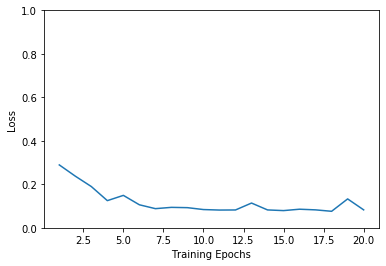

In [97]:
viz.loss_over_epochs(performance_eval['training_loss'])

### Compare Different Learning Rates

In [73]:
nn0 = nn.NeuralNetwork([784, 30, 10], cost=quadraticcost)
trial0 = nn0.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 5, regularization = 0, evaluation_data = test_data, epochs_per_print=20)

Epoch 20 complete
Loss on training data: 0.36
Accuracy on evaluation data: 3092/10000
--> 30.92%


In [74]:
nn1 = nn.NeuralNetwork([784, 30, 10], cost=quadraticcost)
trial1 = nn1.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 1, regularization = 0, evaluation_data = test_data, epochs_per_print=20)

Epoch 20 complete
Loss on training data: 0.04
Accuracy on evaluation data: 9641/10000
--> 96.41%


In [75]:
nn2 = nn.NeuralNetwork([784, 30, 10], cost=quadraticcost)
trial2 = nn2.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 0.5, regularization = 0, evaluation_data = test_data, epochs_per_print=20)

Epoch 20 complete
Loss on training data: 0.04
Accuracy on evaluation data: 9653/10000
--> 96.53%


In [76]:
nn3 = nn.NeuralNetwork([784, 30, 10], cost=quadraticcost)
trial3 = nn3.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 3, regularization = 0, evaluation_data = test_data, epochs_per_print=20)

Epoch 20 complete
Loss on training data: 0.08
Accuracy on evaluation data: 9224/10000
--> 92.24%


In [117]:
accs = [t['evaluation_accuracy'] for t in [trial0, trial1, trial2, trial3]]
losses = [trial0['training_loss'], trial1['training_loss'], trial2['training_loss'], trial3['training_loss']]
labels = ['h = 5', 'h = 1', 'h = 0.5', 'h = 3']

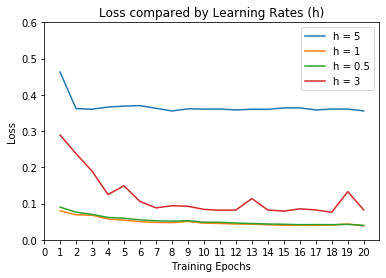

In [107]:
viz.compare_losses(losses, labels)

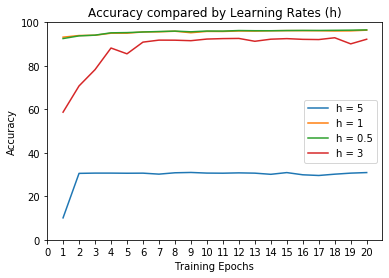

In [121]:
viz.compare_accuracies(accs, labels)

#### Experimenting with Cross Entropy Loss

In [128]:
reload(nn)

<module 'neural_network.neural_network2' from '/Users/nikku/projects/neural_net_classifier/neural_network/neural_network2.py'>

In [133]:
cenn = nn.NeuralNetwork([784,30,10])
ce_trial = cenn.train(training_data, epochs = 20, batch_size = 100, 
         learning_rate = 0.5, regularization = 0.1, evaluation_data = test_data, epochs_per_print=1)

Epoch 1 complete
Loss on training data: 0.42
Accuracy on evaluation data: 3730/10000
--> 37.30%
Epoch 2 complete
Loss on training data: 0.42
Accuracy on evaluation data: 2899/10000
--> 28.99%
Epoch 3 complete
Loss on training data: 0.42
Accuracy on evaluation data: 3148/10000
--> 31.48%
Epoch 4 complete
Loss on training data: 0.42
Accuracy on evaluation data: 2915/10000
--> 29.15%
Epoch 5 complete
Loss on training data: 0.42
Accuracy on evaluation data: 2946/10000
--> 29.46%


KeyboardInterrupt: 